In [24]:
folder = 'data_p'
seed = 1725
N = 4

pay1 = []
expl0 = []
expl1 = []
for i in range(N):
    with open(folder+"/payexpl_{0}_{1:04d}.dat".format(i,seed), "r") as fdata:
        p1 = []
        e0 = []
        e1 = []
        for line in fdata:
            v = list(map(float, line.split()))
            p1.append(v[2])
            e0.append(v[3])
            e1.append(v[4])
        pay1.append(p1)
        expl0.append(e0)
        expl1.append(e1)
#len(pay1[0])

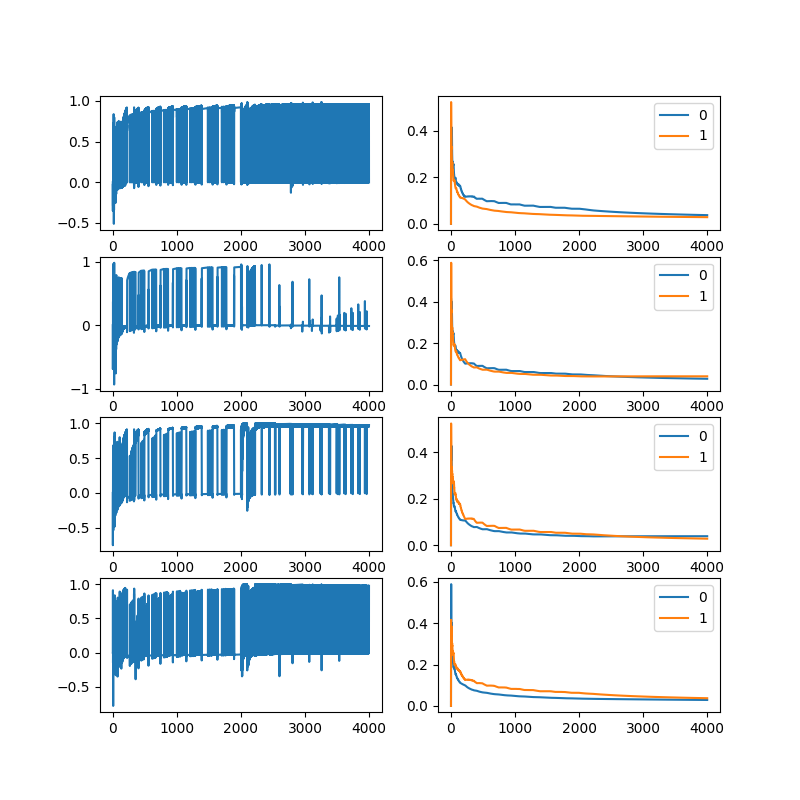

In [25]:
import matplotlib.pyplot as plt
%matplotlib widget

x = [i for i in range(len(pay1[0]))]

fig1, axis = plt.subplots(nrows=N, ncols=2, figsize=(8,8))
for i in range(N):
    axis[i][0].plot(x,pay1[i])
    axis[i][1].plot(x,expl0[i],label="0")
    axis[i][1].plot(x,expl1[i],label="1")
    axis[i][1].legend()

In [26]:
def mean_amplitude(arr):
    dif = [np.abs(arr[i+1]-arr[i]) for i in range(len(arr)-1)]
    return np.mean(dif)

def lowest_disper_n(arr,N):
    minamp, minn = 1.e10, 1e10
    for n in range(2,min(len(arr),2**N)):
        new_arr = []
        for i in range(len(arr)-n):
            new_arr.append(np.mean(arr[i:i+n]))
        amp = mean_amplitude(new_arr)
        if amp < minamp:
            minamp = amp
            minn = n
    return minn

In [27]:
import numpy as np

dif = []
for i in range(N):
    d = []
    for j in range(0,len(pay1[i])-2**N):
        minn = lowest_disper_n(pay1[i][j:j+2**N],N)
        d.append(np.mean(pay1[i][j:j+minn]))
    dif.append(d)

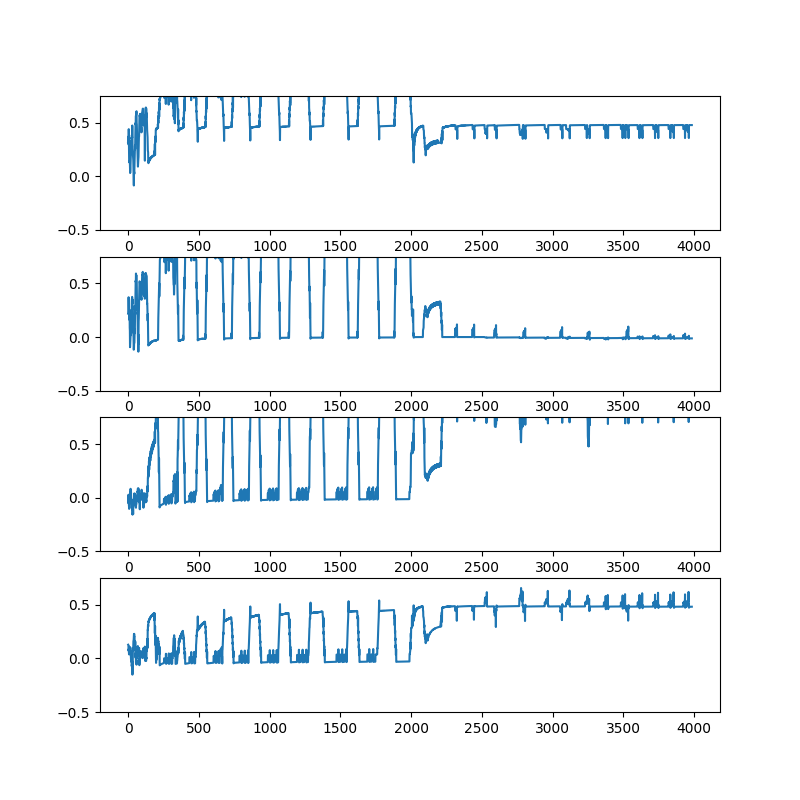

In [28]:
fig2, ax = plt.subplots(nrows=N, ncols=1, figsize=(8,8))
for i in range(N):
    ax[i].plot(dif[i])
    ax[i].set_ylim([-0.5,0.75])